In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# ÏßÄÏó≠ Ïù¥Î¶ÑÍ≥º ÏΩîÎìú ÏÑ§Ï†ï
region_name = "ÎÇ®Íµ¨"
region_code = "5"
target_date = "2019-01-03"  # ÎÇ†Ïßú Ïó¥Ïóê Îì§Ïñ¥Í∞à ÎÇ†Ïßú

# ÏöîÏ≤≠ URL Î∞è ÌååÎùºÎØ∏ÌÑ∞
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# ÏöîÏ≤≠ Î≥¥ÎÇ¥Í∏∞
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML ÌååÏã±
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# Í≤∞Í≥º Ï†ÄÏû• Î¶¨Ïä§Ìä∏
result = []

# Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList ÌÖåÏù¥Î∏îÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")

# DataFrame ÏÉùÏÑ± Î∞è Ïó¥ ÏßÄÏ†ï
columns = ["ÎÇ†Ïßú", "ÌíàÎ™©", "Í∑úÍ≤©", "ÏµúÏ†ÄÍ∞Ä", "ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠", "ÏµúÍ≥†Í∞Ä", "ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠", "Í∞ÄÍ≤©Ï∞®Ïù¥", "Ï∞®Ïù¥ÎπÑÏú®(%)", "Í∏àÏ£ºÌèâÍ∑†Í∞Ä"]
df = pd.DataFrame(result, columns=columns)

# Ìëú ÌòïÌÉúÎ°ú Ï∂úÎ†• (JupyterLab)
display(df)

df.to_csv("ÎÇ®Íµ¨2019_1q.csv", index=False, encoding="utf-8-sig")

ÎÇ†Ïßú     ÌíàÎ™©                        Í∑úÍ≤©    ÏµúÏ†ÄÍ∞Ä ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠    ÏµúÍ≥†Í∞Ä ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠  \
0   2019-01-03   Í∞ÄÎ£®ÎπÑÎàÑ     ÏÑ∏ÌÉÅÏö©ÏÑ∏Ï†ú(LGÌÖåÌÅ¨),Í∞ÄÎ£®Ìòï,3.0kg   8175     ÎÇ®Íµ¨  15675     ÎÇ®Íµ¨   
1   2019-01-03     Í∞ÑÏû•              Ïò§Î≥µÏôïÌëú 0.9‚Ñì 1Î≥ë   6300     ÎÇ®Íµ¨   6300     ÎÇ®Íµ¨   
2   2019-01-03     Îã¨Í±Ä            Ïò§Í≤ΩÏäàÌçºÎûÄ60gÏ†ïÎèÑ 10Í∞ú   2680     ÎÇ®Íµ¨   2680     ÎÇ®Íµ¨   
3   2019-01-03    Îã≠Í≥†Í∏∞                   Ïú°Í≥Ñ 1.0„éè   5145     ÎÇ®Íµ¨   6180     ÎÇ®Íµ¨   
4   2019-01-03     ÎåÄÌåå                      1.0„éè   4082     ÎÇ®Íµ¨   4531     ÎÇ®Íµ¨   
5   2019-01-03   ÎèºÏßÄÍ≥†Í∏∞                  ÏÇºÍ≤πÏÇ¥ 500g   7450     ÎÇ®Íµ¨  13800     ÎÇ®Íµ¨   
6   2019-01-03     ÎëêÎ∂Ä  500g ÌåêÎëêÎ∂Ä(Íµ≠ÏÇ∞Ìè¨Ïû•ÎëêÎ∂Ä 420g) 1Î™®   4365     ÎÇ®Íµ¨   4365     ÎÇ®Íµ¨   
7   2019-01-03     ÎùºÎ©¥              Ïã†ÎùºÎ©¥ 120g 1Î¥âÏßÄ    676     ÎÇ®Íµ¨    676     ÎÇ®Íµ¨   
8   2019-01-03     Îß•Ï£º               ÌïòÏù¥Ìä∏ 500„éñ 1Î≥ë   1400     ÎÇ®Íµ¨   1410     ÎÇ®Íµ¨   
9   2019-01-03      Î¨¥                   2.0„éè 1Í∞ú   1532     ÎÇ®Íµ¨   1706     ÎÇ®Íµ¨   
10  2019-01-03    Î∞ÄÍ∞ÄÎ£®             Î∞±ÏÑ§Ìëú Ï§ëÎ†•Î∂Ñ1Îì±2.5„éè   3080     ÎÇ®Íµ¨   3290     ÎÇ®Íµ¨   
11  2019-01-03     Î∞ÄÍ∞ê                100g Ï†ïÎèÑ10Í∞ú   2980     ÎÇ®Íµ¨   4300     ÎÇ®Íµ¨   
12  2019-01-03      Î∞∞            600g Ï†ïÎèÑ Ïã†Í≥† 10Í∞ú  23707     ÎÇ®Íµ¨  47876     ÎÇ®Íµ¨   
13  2019-01-03     Î∞∞Ï∂î                  2.0„éè 1Ìè¨Í∏∞   1747     ÎÇ®Íµ¨   1800     ÎÇ®Íµ¨   
14  2019-01-03  Î∂ÄÏóåÏö©ÏÑ∏Ï†ú              Ï∞∏Í∑∏Î¶∞1.4„éè1Î¥âÎ¶¨ÌïÑÏö©   3500     ÎÇ®Íµ¨   7990     ÎÇ®Íµ¨   
15  2019-01-03   Î∂ÑÎßêÏª§Ìîº     Îß•Ïã¨ Ïä§Ìã±(Ïª§ÌîºÎØπÏä§) Î™®Ïπ¥Í≥®Îìú 100T  13500     ÎÇ®Íµ¨  13900     ÎÇ®Íµ¨   
16  2019-01-03     ÏÇ¨Í≥º             300gÏ†ïÎèÑ Î∂ÄÏÇ¨ 10Í∞ú  13359     ÎÇ®Íµ¨  19177     ÎÇ®Íµ¨   
17  2019-01-03    ÏÇ¨Ïù¥Îã§              Ïπ†ÏÑ± PETÎ≥ë 1.5‚Ñì   1649     ÎÇ®Íµ¨   2450     ÎÇ®Íµ¨   
18  2019-01-03     ÏÑ§ÌÉï                Î∞±ÏÑ§Ìëú Ï†ïÎ∞±Îãπ 1„éè   1580     ÎÇ®Íµ¨   1630     ÎÇ®Íµ¨   
19  2019-01-03     ÏÜåÏ£º              ÏãúÏõêÏÜåÏ£º 360„éñ 1Î≥ë   1190     ÎÇ®Íµ¨   1190     ÎÇ®Íµ¨   
20  2019-01-03    Ïá†Í≥†Í∏∞             ÌïúÏö∞Îì±Ïã¨ 1Îì±Í∏â 500g  34950     ÎÇ®Íµ¨  39950     ÎÇ®Íµ¨   
21  2019-01-03    ÏãùÏö©Ïú†                Î∞±ÏÑ§ÌëúÏΩ©Í∏∞Î¶Ñ1.8‚Ñì   5040     ÎÇ®Íµ¨   6950     ÎÇ®Íµ¨   
22  2019-01-03      ÏåÄ                 Ï†ïÎØ∏Ìè¨Ïû•ÎØ∏ 20„éè  51900     ÎÇ®Íµ¨  51990     ÎÇ®Íµ¨   
23  2019-01-03     ÏñëÌåå                 1.0„éè-ÏûéÏóÜÎäîÍ≤É   1439     ÎÇ®Íµ¨   1798     ÎÇ®Íµ¨   
24  2019-01-03     Ïö∞Ïú†             Î∂ÄÏÇ∞Ïö∞Ïú† 200„éñ Ï¢ÖÏù¥Ìå©    796     ÎÇ®Íµ¨    796     ÎÇ®Íµ¨   
25  2019-01-03    Ï∞∏Í∏∞Î¶Ñ               Ïò§ÎöúÍ∏∞ 320„éñ 1Î≥ë   7250     ÎÇ®Íµ¨   7290     ÎÇ®Íµ¨   
26  2019-01-03   Ïª§ÌîºÌÅ¨Î¶º               ÎèôÏÑú 500g Î¶¨ÌïÑÏö©   2550     ÎÇ®Íµ¨   3290     ÎÇ®Íµ¨   
27  2019-01-03     ÏΩúÎùº            ÏΩîÏπ¥ÏΩúÎùº PETÎ≥ë 1.8‚Ñì   2480     ÎÇ®Íµ¨   3130     ÎÇ®Íµ¨   
28  2019-01-03    ÌôîÏû•ÏßÄ          ÎΩÄÏÇêÌîåÎü¨Ïä§30m√ó30Î°§(3Í≤π)  17900     ÎÇ®Íµ¨  19600     ÎÇ®Íµ¨   

     Í∞ÄÍ≤©Ï∞®Ïù¥  Ï∞®Ïù¥ÎπÑÏú®(%)   Í∏àÏ£ºÌèâÍ∑†Í∞Ä  
0    7500   91.74%  11,925  
1       0     0.0%   6,300  
2       0     0.0%   2,680  
3    1035   20.12%   5,663  
4     449    11.0%   4,307  
5    6350   85.23%  10,625  
6       0     0.0%   4,365  
7       0     0.0%     676  
8      10    0.71%   1,405  
9     174   11.36%   1,619  
10    210    6.82%   3,185  
11   1320    44.3%   3,640  
12  24169  101.95%  35,792  
13     53    3.03%   1,774  
14   4490  128.29%   5,745  
15    400    2.96%  13,700  
16   5818   43.55%  16,268  
17    801   48.57%   2,050  
18     50    3.16%   1,605  
19      0     0.0%   1,190  
20   5000   14.31%  37,450  
21   1910    37.9%   5,995  
22     90    0.17%  51,945  
23    359   24.95%   1,619  
24      0     0.0%     796  
25     40    0.55%   7,270  
26    740   29.02%   2,920  
27    650   26.21%   2,805  
28   1700    

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# ÏßÄÏó≠ Ïù¥Î¶ÑÍ≥º ÏΩîÎìú ÏÑ§Ï†ï
region_name = "ÎÇ®Íµ¨"
region_code = "5"
target_date = "2019-04-04"  # ÎÇ†Ïßú Ïó¥Ïóê Îì§Ïñ¥Í∞à ÎÇ†Ïßú

# ÏöîÏ≤≠ URL Î∞è ÌååÎùºÎØ∏ÌÑ∞
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# ÏöîÏ≤≠ Î≥¥ÎÇ¥Í∏∞
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML ÌååÏã±
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# Í≤∞Í≥º Ï†ÄÏû• Î¶¨Ïä§Ìä∏
result = []

# Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList ÌÖåÏù¥Î∏îÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")

# DataFrame ÏÉùÏÑ± Î∞è Ïó¥ ÏßÄÏ†ï
columns = ["ÎÇ†Ïßú", "ÌíàÎ™©", "Í∑úÍ≤©", "ÏµúÏ†ÄÍ∞Ä", "ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠", "ÏµúÍ≥†Í∞Ä", "ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠", "Í∞ÄÍ≤©Ï∞®Ïù¥", "Ï∞®Ïù¥ÎπÑÏú®(%)", "Í∏àÏ£ºÌèâÍ∑†Í∞Ä"]
df = pd.DataFrame(result, columns=columns)

# Ìëú ÌòïÌÉúÎ°ú Ï∂úÎ†• (JupyterLab)
display(df)

df.to_csv("ÎÇ®Íµ¨2019_2q.csv", index=False, encoding="utf-8-sig")

ÎÇ†Ïßú     ÌíàÎ™©                        Í∑úÍ≤©    ÏµúÏ†ÄÍ∞Ä ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠    ÏµúÍ≥†Í∞Ä ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠  \
0   2019-04-04   Í∞ÄÎ£®ÎπÑÎàÑ     ÏÑ∏ÌÉÅÏö©ÏÑ∏Ï†ú(LGÌÖåÌÅ¨),Í∞ÄÎ£®Ìòï,3.0kg   8175     ÎÇ®Íµ¨  14175     ÎÇ®Íµ¨   
1   2019-04-04     Í∞ÑÏû•              Ïò§Î≥µÏôïÌëú 0.9‚Ñì 1Î≥ë   6300     ÎÇ®Íµ¨   6300     ÎÇ®Íµ¨   
2   2019-04-04     Îã¨Í±Ä            Ïò§Í≤ΩÏäàÌçºÎûÄ60gÏ†ïÎèÑ 10Í∞ú   2480     ÎÇ®Íµ¨   2690     ÎÇ®Íµ¨   
3   2019-04-04    Îã≠Í≥†Í∏∞                   Ïú°Í≥Ñ 1.0„éè   5145     ÎÇ®Íµ¨   5980     ÎÇ®Íµ¨   
4   2019-04-04     ÎåÄÌåå                      1.0„éè   1753     ÎÇ®Íµ¨   2300     ÎÇ®Íµ¨   
5   2019-04-04   ÎèºÏßÄÍ≥†Í∏∞                  ÏÇºÍ≤πÏÇ¥ 500g   7400     ÎÇ®Íµ¨  15400     ÎÇ®Íµ¨   
6   2019-04-04     ÎëêÎ∂Ä  500g ÌåêÎëêÎ∂Ä(Íµ≠ÏÇ∞Ìè¨Ïû•ÎëêÎ∂Ä 420g) 1Î™®   4531     ÎÇ®Íµ¨   4531     ÎÇ®Íµ¨   
7   2019-04-04     ÎùºÎ©¥              Ïã†ÎùºÎ©¥ 120g 1Î¥âÏßÄ    676     ÎÇ®Íµ¨    676     ÎÇ®Íµ¨   
8   2019-04-04     Îß•Ï£º               ÌïòÏù¥Ìä∏ 500„éñ 1Î≥ë   1400     ÎÇ®Íµ¨   1410     ÎÇ®Íµ¨   
9   2019-04-04      Î¨¥                   2.0„éè 1Í∞ú   2186     ÎÇ®Íµ¨   2560     ÎÇ®Íµ¨   
10  2019-04-04    Î∞ÄÍ∞ÄÎ£®             Î∞±ÏÑ§Ìëú Ï§ëÎ†•Î∂Ñ1Îì±2.5„éè   3080     ÎÇ®Íµ¨   3290     ÎÇ®Íµ¨   
11  2019-04-04     Î∞ÄÍ∞ê                100g Ï†ïÎèÑ10Í∞ú   6995     ÎÇ®Íµ¨   7480     ÎÇ®Íµ¨   
12  2019-04-04      Î∞∞            600g Ï†ïÎèÑ Ïã†Í≥† 10Í∞ú  39800     ÎÇ®Íµ¨  45718     ÎÇ®Íµ¨   
13  2019-04-04     Î∞∞Ï∂î                  2.0„éè 1Ìè¨Í∏∞   1330     ÎÇ®Íµ¨   1804     ÎÇ®Íµ¨   
14  2019-04-04  Î∂ÄÏóåÏö©ÏÑ∏Ï†ú              Ï∞∏Í∑∏Î¶∞1.4„éè1Î¥âÎ¶¨ÌïÑÏö©   3500     ÎÇ®Íµ¨   7990     ÎÇ®Íµ¨   
15  2019-04-04   Î∂ÑÎßêÏª§Ìîº     Îß•Ïã¨ Ïä§Ìã±(Ïª§ÌîºÎØπÏä§) Î™®Ïπ¥Í≥®Îìú 100T  10900     ÎÇ®Íµ¨  13500     ÎÇ®Íµ¨   
16  2019-04-04     ÏÇ¨Í≥º             300gÏ†ïÎèÑ Î∂ÄÏÇ¨ 10Í∞ú  14196     ÎÇ®Íµ¨  19380     ÎÇ®Íµ¨   
17  2019-04-04    ÏÇ¨Ïù¥Îã§              Ïπ†ÏÑ± PETÎ≥ë 1.5‚Ñì   1816     ÎÇ®Íµ¨   2690     ÎÇ®Íµ¨   
18  2019-04-04     ÏÑ§ÌÉï                Î∞±ÏÑ§Ìëú Ï†ïÎ∞±Îãπ 1„éè   1580     ÎÇ®Íµ¨   1630     ÎÇ®Íµ¨   
19  2019-04-04     ÏÜåÏ£º              ÏãúÏõêÏÜåÏ£º 360„éñ 1Î≥ë   1190     ÎÇ®Íµ¨   1190     ÎÇ®Íµ¨   
20  2019-04-04    Ïá†Í≥†Í∏∞             ÌïúÏö∞Îì±Ïã¨ 1Îì±Í∏â 500g  47450     ÎÇ®Íµ¨  54000     ÎÇ®Íµ¨   
21  2019-04-04    ÏãùÏö©Ïú†                Î∞±ÏÑ§ÌëúÏΩ©Í∏∞Î¶Ñ1.8‚Ñì   3540     ÎÇ®Íµ¨   6950     ÎÇ®Íµ¨   
22  2019-04-04      ÏåÄ                 Ï†ïÎØ∏Ìè¨Ïû•ÎØ∏ 20„éè  49900     ÎÇ®Íµ¨  51990     ÎÇ®Íµ¨   
23  2019-04-04     ÏñëÌåå                 1.0„éè-ÏûéÏóÜÎäîÍ≤É   1641     ÎÇ®Íµ¨   1752     ÎÇ®Íµ¨   
24  2019-04-04     Ïö∞Ïú†             Î∂ÄÏÇ∞Ïö∞Ïú† 200„éñ Ï¢ÖÏù¥Ìå©    796     ÎÇ®Íµ¨    796     ÎÇ®Íµ¨   
25  2019-04-04    Ï∞∏Í∏∞Î¶Ñ               Ïò§ÎöúÍ∏∞ 320„éñ 1Î≥ë   7250     ÎÇ®Íµ¨   7290     ÎÇ®Íµ¨   
26  2019-04-04   Ïª§ÌîºÌÅ¨Î¶º               ÎèôÏÑú 500g Î¶¨ÌïÑÏö©   2550     ÎÇ®Íµ¨   3290     ÎÇ®Íµ¨   
27  2019-04-04     ÏΩúÎùº            ÏΩîÏπ¥ÏΩúÎùº PETÎ≥ë 1.8‚Ñì   2190     ÎÇ®Íµ¨   3130     ÎÇ®Íµ¨   
28  2019-04-04    ÌôîÏû•ÏßÄ          ÎΩÄÏÇêÌîåÎü¨Ïä§30m√ó30Î°§(3Í≤π)  19600     ÎÇ®Íµ¨  27200     ÎÇ®Íµ¨   

    Í∞ÄÍ≤©Ï∞®Ïù¥  Ï∞®Ïù¥ÎπÑÏú®(%)   Í∏àÏ£ºÌèâÍ∑†Í∞Ä  
0   6000   73.39%  11,175  
1      0     0.0%   6,300  
2    210    8.47%   2,585  
3    835   16.23%   5,563  
4    547    31.2%   2,027  
5   8000  108.11%  11,400  
6      0     0.0%   4,531  
7      0     0.0%     676  
8     10    0.71%   1,405  
9    374   17.11%   2,373  
10   210    6.82%   3,185  
11   485    6.93%   7,238  
12  5918   14.87%  42,759  
13   474   35.64%   1,567  
14  4490  128.29%   5,745  
15  2600   23.85%  12,200  
16  5184   36.52%  16,788  
17   874   48.13%   2,253  
18    50    3.16%   1,605  
19     0     0.0%   1,190  
20  6550    13.8%  50,725  
21  3410   96.33%   5,245  
22  2090    4.19%  50,945  
23   111    6.76%   1,697  
24     0     0.0%     796  
25    40    0.55%   7,270  
26   740   29.02%   2,920  
27   940   42.92%   2,660  
28  7600   38.78%  23,400

In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# ÏßÄÏó≠ Ïù¥Î¶ÑÍ≥º ÏΩîÎìú ÏÑ§Ï†ï
region_name = "ÎÇ®Íµ¨"
region_code = "5"
target_date = "2019-07-04"  # ÎÇ†Ïßú Ïó¥Ïóê Îì§Ïñ¥Í∞à ÎÇ†Ïßú

# ÏöîÏ≤≠ URL Î∞è ÌååÎùºÎØ∏ÌÑ∞
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# ÏöîÏ≤≠ Î≥¥ÎÇ¥Í∏∞
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML ÌååÏã±
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# Í≤∞Í≥º Ï†ÄÏû• Î¶¨Ïä§Ìä∏
result = []

# Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList ÌÖåÏù¥Î∏îÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")

# DataFrame ÏÉùÏÑ± Î∞è Ïó¥ ÏßÄÏ†ï
columns = ["ÎÇ†Ïßú", "ÌíàÎ™©", "Í∑úÍ≤©", "ÏµúÏ†ÄÍ∞Ä", "ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠", "ÏµúÍ≥†Í∞Ä", "ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠", "Í∞ÄÍ≤©Ï∞®Ïù¥", "Ï∞®Ïù¥ÎπÑÏú®(%)", "Í∏àÏ£ºÌèâÍ∑†Í∞Ä"]
df = pd.DataFrame(result, columns=columns)

# Ìëú ÌòïÌÉúÎ°ú Ï∂úÎ†• (JupyterLab)
display(df)

df.to_csv("ÎÇ®Íµ¨2019_3q.csv", index=False, encoding="utf-8-sig")

ÎÇ†Ïßú     ÌíàÎ™©                        Í∑úÍ≤©    ÏµúÏ†ÄÍ∞Ä ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠    ÏµúÍ≥†Í∞Ä ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠  \
0   2019-07-04   Í∞ÄÎ£®ÎπÑÎàÑ     ÏÑ∏ÌÉÅÏö©ÏÑ∏Ï†ú(LGÌÖåÌÅ¨),Í∞ÄÎ£®Ìòï,3.0kg   5962     ÎÇ®Íµ¨   7425     ÎÇ®Íµ¨   
1   2019-07-04     Í∞ÑÏû•              Ïò§Î≥µÏôïÌëú 0.9‚Ñì 1Î≥ë   6300     ÎÇ®Íµ¨   6300     ÎÇ®Íµ¨   
2   2019-07-04     Îã¨Í±Ä            Ïò§Í≤ΩÏäàÌçºÎûÄ60gÏ†ïÎèÑ 10Í∞ú   2690     ÎÇ®Íµ¨   2780     ÎÇ®Íµ¨   
3   2019-07-04    Îã≠Í≥†Í∏∞                   Ïú°Í≥Ñ 1.0„éè   5245     ÎÇ®Íµ¨   5550     ÎÇ®Íµ¨   
4   2019-07-04     ÎåÄÌåå                      1.0„éè   2490     ÎÇ®Íµ¨   3260     ÎÇ®Íµ¨   
5   2019-07-04   ÎèºÏßÄÍ≥†Í∏∞                  ÏÇºÍ≤πÏÇ¥ 500g   8450     ÎÇ®Íµ¨  15900     ÎÇ®Íµ¨   
6   2019-07-04     ÎëêÎ∂Ä  500g ÌåêÎëêÎ∂Ä(Íµ≠ÏÇ∞Ìè¨Ïû•ÎëêÎ∂Ä 420g) 1Î™®   4531     ÎÇ®Íµ¨   4531     ÎÇ®Íµ¨   
7   2019-07-04     ÎùºÎ©¥              Ïã†ÎùºÎ©¥ 120g 1Î¥âÏßÄ    676     ÎÇ®Íµ¨    676     ÎÇ®Íµ¨   
8   2019-07-04     Îß•Ï£º               ÌïòÏù¥Ìä∏ 500„éñ 1Î≥ë   1400     ÎÇ®Íµ¨   1410     ÎÇ®Íµ¨   
9   2019-07-04      Î¨¥                   2.0„éè 1Í∞ú   1680     ÎÇ®Íµ¨   2131     ÎÇ®Íµ¨   
10  2019-07-04    Î∞ÄÍ∞ÄÎ£®             Î∞±ÏÑ§Ìëú Ï§ëÎ†•Î∂Ñ1Îì±2.5„éè   3080     ÎÇ®Íµ¨   3290     ÎÇ®Íµ¨   
11  2019-07-04     Î∞ÄÍ∞ê                100g Ï†ïÎèÑ10Í∞ú   9992     ÎÇ®Íµ¨  10570     ÎÇ®Íµ¨   
12  2019-07-04      Î∞∞            600g Ï†ïÎèÑ Ïã†Í≥† 10Í∞ú  34500     ÎÇ®Íµ¨  46789     ÎÇ®Íµ¨   
13  2019-07-04     Î∞∞Ï∂î                  2.0„éè 1Ìè¨Í∏∞   2280     ÎÇ®Íµ¨   2299     ÎÇ®Íµ¨   
14  2019-07-04  Î∂ÄÏóåÏö©ÏÑ∏Ï†ú              Ï∞∏Í∑∏Î¶∞1.4„éè1Î¥âÎ¶¨ÌïÑÏö©   3465     ÎÇ®Íµ¨   3900     ÎÇ®Íµ¨   
15  2019-07-04   Î∂ÑÎßêÏª§Ìîº     Îß•Ïã¨ Ïä§Ìã±(Ïª§ÌîºÎØπÏä§) Î™®Ïπ¥Í≥®Îìú 100T  13500     ÎÇ®Íµ¨  13990     ÎÇ®Íµ¨   
16  2019-07-04     ÏÇ¨Í≥º             300gÏ†ïÎèÑ Î∂ÄÏÇ¨ 10Í∞ú  19894     ÎÇ®Íµ¨  19985     ÎÇ®Íµ¨   
17  2019-07-04    ÏÇ¨Ïù¥Îã§              Ïπ†ÏÑ± PETÎ≥ë 1.5‚Ñì   2316     ÎÇ®Íµ¨   2690     ÎÇ®Íµ¨   
18  2019-07-04     ÏÑ§ÌÉï                Î∞±ÏÑ§Ìëú Ï†ïÎ∞±Îãπ 1„éè   1630     ÎÇ®Íµ¨   1680     ÎÇ®Íµ¨   
19  2019-07-04     ÏÜåÏ£º              ÏãúÏõêÏÜåÏ£º 360„éñ 1Î≥ë   1190     ÎÇ®Íµ¨   1190     ÎÇ®Íµ¨   
20  2019-07-04    Ïá†Í≥†Í∏∞             ÌïúÏö∞Îì±Ïã¨ 1Îì±Í∏â 500g  35395     ÎÇ®Íµ¨  43950     ÎÇ®Íµ¨   
21  2019-07-04    ÏãùÏö©Ïú†                Î∞±ÏÑ§ÌëúÏΩ©Í∏∞Î¶Ñ1.8‚Ñì   6950     ÎÇ®Íµ¨   7188     ÎÇ®Íµ¨   
22  2019-07-04      ÏåÄ                 Ï†ïÎØ∏Ìè¨Ïû•ÎØ∏ 20„éè  47900     ÎÇ®Íµ¨  49990     ÎÇ®Íµ¨   
23  2019-07-04     ÏñëÌåå                 1.0„éè-ÏûéÏóÜÎäîÍ≤É   1164     ÎÇ®Íµ¨   1438     ÎÇ®Íµ¨   
24  2019-07-04     Ïö∞Ïú†             Î∂ÄÏÇ∞Ïö∞Ïú† 200„éñ Ï¢ÖÏù¥Ìå©    796     ÎÇ®Íµ¨    796     ÎÇ®Íµ¨   
25  2019-07-04    Ï∞∏Í∏∞Î¶Ñ               Ïò§ÎöúÍ∏∞ 320„éñ 1Î≥ë   7250     ÎÇ®Íµ¨   7290     ÎÇ®Íµ¨   
26  2019-07-04   Ïª§ÌîºÌÅ¨Î¶º               ÎèôÏÑú 500g Î¶¨ÌïÑÏö©   2550     ÎÇ®Íµ¨   3290     ÎÇ®Íµ¨   
27  2019-07-04     ÏΩúÎùº            ÏΩîÏπ¥ÏΩúÎùº PETÎ≥ë 1.8‚Ñì   2490     ÎÇ®Íµ¨   2490     ÎÇ®Íµ¨   
28  2019-07-04    ÌôîÏû•ÏßÄ          ÎΩÄÏÇêÌîåÎü¨Ïä§30m√ó30Î°§(3Í≤π)  18562     ÎÇ®Íµ¨  20500     ÎÇ®Íµ¨   

     Í∞ÄÍ≤©Ï∞®Ïù¥ Ï∞®Ïù¥ÎπÑÏú®(%)   Í∏àÏ£ºÌèâÍ∑†Í∞Ä  
0    1463  24.54%   6,694  
1       0    0.0%   6,300  
2      90   3.35%   2,735  
3     305   5.82%   5,398  
4     770  30.92%   2,875  
5    7450  88.17%  12,175  
6       0    0.0%   4,531  
7       0    0.0%     676  
8      10   0.71%   1,405  
9     451  26.85%   1,906  
10    210   6.82%   3,185  
11    578   5.78%  10,281  
12  12289  35.62%  40,645  
13     19   0.83%   2,290  
14    435  12.55%   3,683  
15    490   3.63%  13,745  
16     91   0.46%  19,940  
17    374  16.15%   2,503  
18     50   3.07%   1,655  
19      0    0.0%   1,190  
20   8555  24.17%  39,673  
21    238   3.42%   7,069  
22   2090   4.36%  48,945  
23    274  23.54%   1,301  
24      0    0.0%     796  
25     40   0.55%   7,270  
26    740  29.02%   2,920  
27      0    0.0%   2,490  
28   1938  10.44%  19,531

In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# ÏßÄÏó≠ Ïù¥Î¶ÑÍ≥º ÏΩîÎìú ÏÑ§Ï†ï
region_name = "ÎÇ®Íµ¨"
region_code = "5"
target_date = "2019-10-10"  # ÎÇ†Ïßú Ïó¥Ïóê Îì§Ïñ¥Í∞à ÎÇ†Ïßú

# ÏöîÏ≤≠ URL Î∞è ÌååÎùºÎØ∏ÌÑ∞
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# ÏöîÏ≤≠ Î≥¥ÎÇ¥Í∏∞
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML ÌååÏã±
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# Í≤∞Í≥º Ï†ÄÏû• Î¶¨Ïä§Ìä∏
result = []

# Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList ÌÖåÏù¥Î∏îÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")

# DataFrame ÏÉùÏÑ± Î∞è Ïó¥ ÏßÄÏ†ï
columns = ["ÎÇ†Ïßú", "ÌíàÎ™©", "Í∑úÍ≤©", "ÏµúÏ†ÄÍ∞Ä", "ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠", "ÏµúÍ≥†Í∞Ä", "ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠", "Í∞ÄÍ≤©Ï∞®Ïù¥", "Ï∞®Ïù¥ÎπÑÏú®(%)", "Í∏àÏ£ºÌèâÍ∑†Í∞Ä"]
df = pd.DataFrame(result, columns=columns)

# Ìëú ÌòïÌÉúÎ°ú Ï∂úÎ†• (JupyterLab)
display(df)

df.to_csv("ÎÇ®Íµ¨2019_4q.csv", index=False, encoding="utf-8-sig")

ÎÇ†Ïßú     ÌíàÎ™©                        Í∑úÍ≤©    ÏµúÏ†ÄÍ∞Ä ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠    ÏµúÍ≥†Í∞Ä ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠  \
0   2019-10-10   Í∞ÄÎ£®ÎπÑÎàÑ     ÏÑ∏ÌÉÅÏö©ÏÑ∏Ï†ú(LGÌÖåÌÅ¨),Í∞ÄÎ£®Ìòï,3.0kg   7837     ÎÇ®Íµ¨   8175     ÎÇ®Íµ¨   
1   2019-10-10     Í∞ÑÏû•              Ïò§Î≥µÏôïÌëú 0.9‚Ñì 1Î≥ë   6300     ÎÇ®Íµ¨   6300     ÎÇ®Íµ¨   
2   2019-10-10     Í∞àÏπò       60cmÏ†ïÎèÑ 500g 1ÎßàÎ¶¨(ÎÉâÎèô)   4630     ÎÇ®Íµ¨   7692     ÎÇ®Íµ¨   
3   2019-10-10    Í≥†Îì±Ïñ¥            30„éùÏ†ïÎèÑ 500g 1ÎßàÎ¶¨   2469     ÎÇ®Íµ¨   3584     ÎÇ®Íµ¨   
4   2019-10-10     Îã¨Í±Ä            Ïò§Í≤ΩÏäàÌçºÎûÄ60gÏ†ïÎèÑ 10Í∞ú   2680     ÎÇ®Íµ¨   2690     ÎÇ®Íµ¨   
5   2019-10-10    Îã≠Í≥†Í∏∞                   Ïú°Í≥Ñ 1.0„éè   4995     ÎÇ®Íµ¨   5700     ÎÇ®Íµ¨   
6   2019-10-10     ÎåÄÌåå                      1.0„éè   3790     ÎÇ®Íµ¨   4474     ÎÇ®Íµ¨   
7   2019-10-10   ÎèºÏßÄÍ≥†Í∏∞                  ÏÇºÍ≤πÏÇ¥ 500g   9900     ÎÇ®Íµ¨  14900     ÎÇ®Íµ¨   
8   2019-10-10     ÎëêÎ∂Ä  500g ÌåêÎëêÎ∂Ä(Íµ≠ÏÇ∞Ìè¨Ïû•ÎëêÎ∂Ä 420g) 1Î™®   4531     ÎÇ®Íµ¨   4531     ÎÇ®Íµ¨   
9   2019-10-10     ÎùºÎ©¥              Ïã†ÎùºÎ©¥ 120g 1Î¥âÏßÄ    590     ÎÇ®Íµ¨    676     ÎÇ®Íµ¨   
10  2019-10-10     Îß•Ï£º               ÌïòÏù¥Ìä∏ 500„éñ 1Î≥ë   1410     ÎÇ®Íµ¨   1410     ÎÇ®Íµ¨   
11  2019-10-10      Î¨¥                   2.0„éè 1Í∞ú   3440     ÎÇ®Íµ¨   3890     ÎÇ®Íµ¨   
12  2019-10-10    Î∞ÄÍ∞ÄÎ£®             Î∞±ÏÑ§Ìëú Ï§ëÎ†•Î∂Ñ1Îì±2.5„éè   3080     ÎÇ®Íµ¨   3290     ÎÇ®Íµ¨   
13  2019-10-10     Î∞ÄÍ∞ê                100g Ï†ïÎèÑ10Í∞ú   5950     ÎÇ®Íµ¨   7216     ÎÇ®Íµ¨   
14  2019-10-10      Î∞∞            600g Ï†ïÎèÑ Ïã†Í≥† 10Í∞ú  13960     ÎÇ®Íµ¨  27245     ÎÇ®Íµ¨   
15  2019-10-10     Î∞∞Ï∂î                  2.0„éè 1Ìè¨Í∏∞   5541     ÎÇ®Íµ¨   5980     ÎÇ®Íµ¨   
16  2019-10-10  Î∂ÄÏóåÏö©ÏÑ∏Ï†ú              Ï∞∏Í∑∏Î¶∞1.4„éè1Î¥âÎ¶¨ÌïÑÏö©   3900     ÎÇ®Íµ¨   6930     ÎÇ®Íµ¨   
17  2019-10-10   Î∂ÑÎßêÏª§Ìîº     Îß•Ïã¨ Ïä§Ìã±(Ïª§ÌîºÎØπÏä§) Î™®Ïπ¥Í≥®Îìú 100T  10900     ÎÇ®Íµ¨  10990     ÎÇ®Íµ¨   
18  2019-10-10     ÏÇ¨Í≥º             300gÏ†ïÎèÑ Î∂ÄÏÇ¨ 10Í∞ú  14253     ÎÇ®Íµ¨  19186     ÎÇ®Íµ¨   
19  2019-10-10    ÏÇ¨Ïù¥Îã§              Ïπ†ÏÑ± PETÎ≥ë 1.5‚Ñì   1816     ÎÇ®Íµ¨   2690     ÎÇ®Íµ¨   
20  2019-10-10     ÏÑ§ÌÉï                Î∞±ÏÑ§Ìëú Ï†ïÎ∞±Îãπ 1„éè   1580     ÎÇ®Íµ¨   1680     ÎÇ®Íµ¨   
21  2019-10-10     ÏÜåÏ£º              ÏãúÏõêÏÜåÏ£º 360„éñ 1Î≥ë   1190     ÎÇ®Íµ¨   1190     ÎÇ®Íµ¨   
22  2019-10-10    Ïá†Í≥†Í∏∞             ÌïúÏö∞Îì±Ïã¨ 1Îì±Í∏â 500g  47450     ÎÇ®Íµ¨  54000     ÎÇ®Íµ¨   
23  2019-10-10    ÏãùÏö©Ïú†                Î∞±ÏÑ§ÌëúÏΩ©Í∏∞Î¶Ñ1.8‚Ñì   6950     ÎÇ®Íµ¨   7188     ÎÇ®Íµ¨   
24  2019-10-10      ÏåÄ                 Ï†ïÎØ∏Ìè¨Ïû•ÎØ∏ 20„éè  48800     ÎÇ®Íµ¨  49900     ÎÇ®Íµ¨   
25  2019-10-10     ÏñëÌåå                 1.0„éè-ÏûéÏóÜÎäîÍ≤É   1327     ÎÇ®Íµ¨   1400     ÎÇ®Íµ¨   
26  2019-10-10    Ïò§ÏßïÏñ¥       25cmÏ†ïÎèÑ 500g 2ÎßàÎ¶¨(ÎÉâÎèô)   5243     ÎÇ®Íµ¨  10564     ÎÇ®Íµ¨   
27  2019-10-10     Ïö∞Ïú†             Î∂ÄÏÇ∞Ïö∞Ïú† 200„éñ Ï¢ÖÏù¥Ìå©    796     ÎÇ®Íµ¨    796     ÎÇ®Íµ¨   
28  2019-10-10    Ï∞∏Í∏∞Î¶Ñ               Ïò§ÎöúÍ∏∞ 320„éñ 1Î≥ë   7240     ÎÇ®Íµ¨   7290     ÎÇ®Íµ¨   
29  2019-10-10   Ïª§ÌîºÌÅ¨Î¶º               ÎèôÏÑú 500g Î¶¨ÌïÑÏö©   2550     ÎÇ®Íµ¨   3290     ÎÇ®Íµ¨   
30  2019-10-10     ÏΩúÎùº            ÏΩîÏπ¥ÏΩúÎùº PETÎ≥ë 1.8‚Ñì   2490     ÎÇ®Íµ¨   3130     ÎÇ®Íµ¨   
31  2019-10-10    ÌôîÏû•ÏßÄ          ÎΩÄÏÇêÌîåÎü¨Ïä§30m√ó30Î°§(3Í≤π)  25822     ÎÇ®Íµ¨  27200     ÎÇ®Íµ¨   

     Í∞ÄÍ≤©Ï∞®Ïù¥  Ï∞®Ïù¥ÎπÑÏú®(%)   Í∏àÏ£ºÌèâÍ∑†Í∞Ä  
0     338    4.31%   8,006  
1       0     0.0%   6,300  
2    3062   66.13%   6,161  
3    1115   45.16%   3,027  
4      10    0.37%   2,685  
5     705   14.11%   5,348  
6     684   18.05%   4,132  
7    5000   50.51%  12,400  
8       0     0.0%   4,531  
9      86   14.58%     633  
10      0     0.0%   1,410  
11    450   13.08%   3,665  
12    210    6.82%   3,185  
13   1266   21.28%   6,583  
14  13285   95.16%  20,603  
15    439    7.92%   5,761  
16   3030   77.69%   5,415  
17     90    0.83%  1

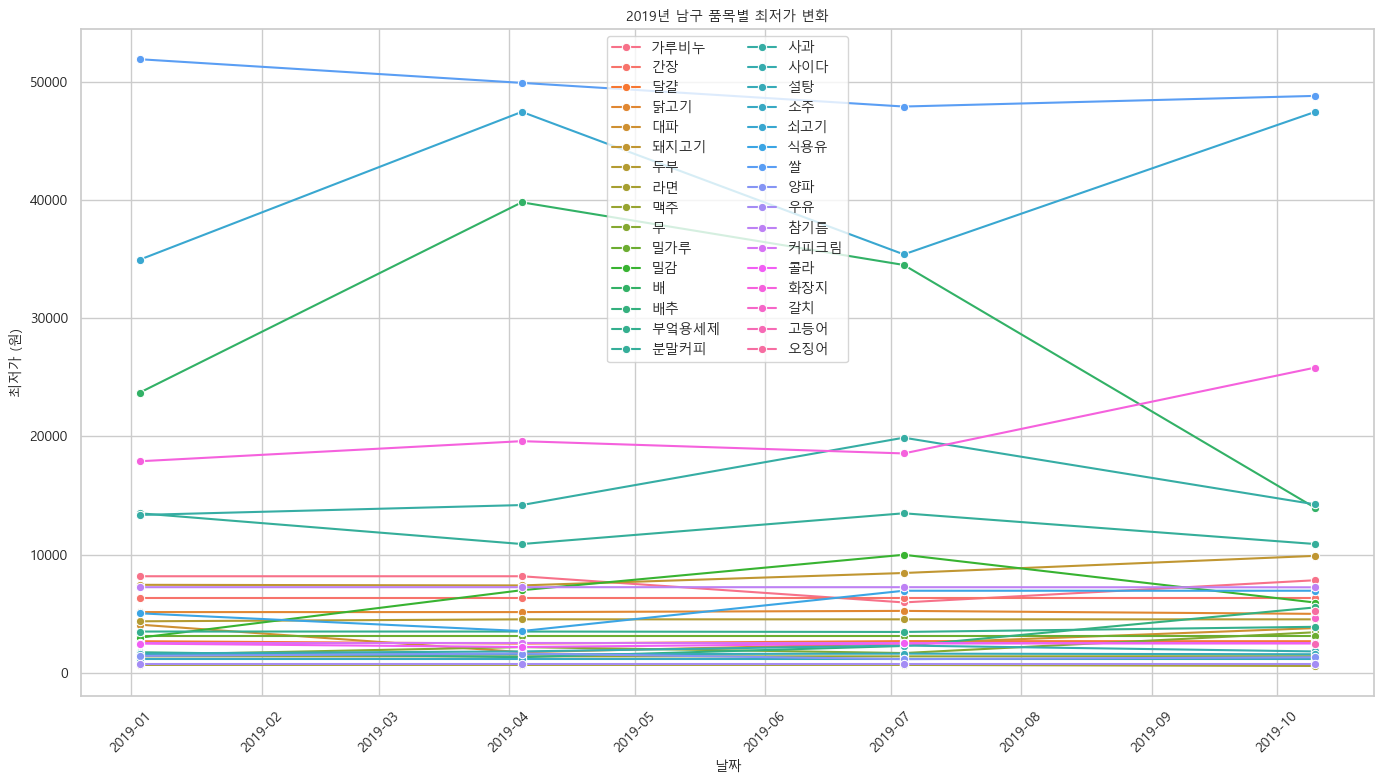

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.font_manager import FontProperties

# üìå Í∞ïÏ†úÎ°ú Ìè∞Ìä∏ ÏßÄÏ†ï
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = FontProperties(fname=font_path)

# CSV ÌååÏùº Î∂àÎü¨Ïò§Í∏∞
q1 = pd.read_csv("ÎÇ®Íµ¨2019_1q.csv")
q2 = pd.read_csv("ÎÇ®Íµ¨2019_2q.csv")
q3 = pd.read_csv("ÎÇ®Íµ¨2019_3q.csv")
q4 = pd.read_csv("ÎÇ®Íµ¨2019_4q.csv")

# ÌïòÎÇòÎ°ú Ìï©ÏπòÍ∏∞
df_all = pd.concat([q1, q2, q3, q4], ignore_index=True)
df_all["ÎÇ†Ïßú"] = pd.to_datetime(df_all["ÎÇ†Ïßú"])

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# ÏÑ†Í∑∏ÎûòÌîÑ
sns.lineplot(data=df_all, x="ÎÇ†Ïßú", y="ÏµúÏ†ÄÍ∞Ä", hue="ÌíàÎ™©", marker="o")

# Í∑∏ÎûòÌîÑ Íæ∏ÎØ∏Í∏∞ (Ïó¨Í∏∞ÏÑú FontProperties Ï†ÅÏö©!)
plt.title("2019ÎÖÑ ÎÇ®Íµ¨ ÌíàÎ™©Î≥Ñ ÏµúÏ†ÄÍ∞Ä Î≥ÄÌôî", fontsize=16, fontproperties=font_prop)
plt.xlabel("ÎÇ†Ïßú", fontproperties=font_prop)
plt.ylabel("ÏµúÏ†ÄÍ∞Ä (Ïõê)", fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.legend(loc="best", fontsize=9, ncol=2, prop=font_prop)
plt.tight_layout()
plt.show()


# df_allÏùÑ Ï†ÄÏû•ÌïòÎäî ÏΩîÎìú
df_all.to_csv("ÎÇ®Íµ¨2019_min.csv", index=False, encoding="utf-8-sig")

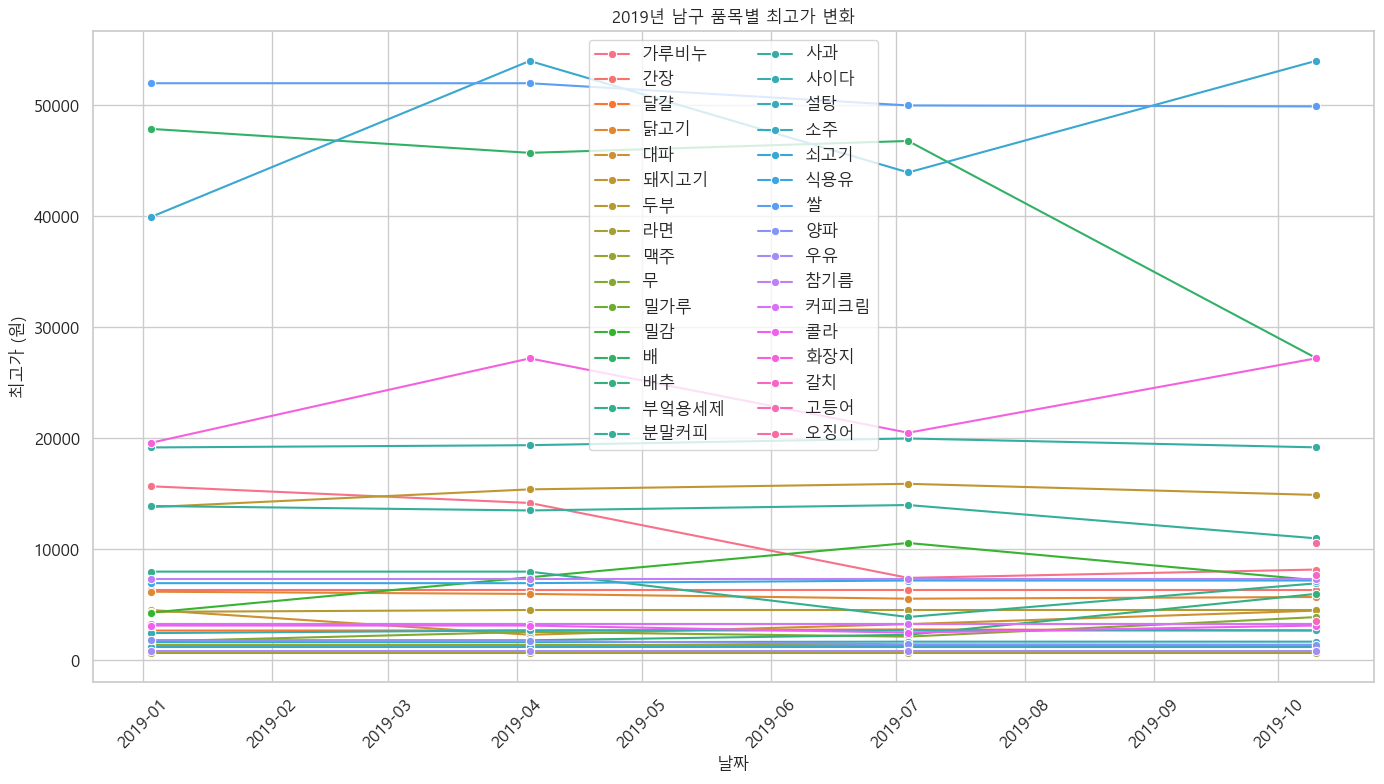

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.font_manager import FontProperties

# üìå Í∞ïÏ†úÎ°ú Ìè∞Ìä∏ ÏßÄÏ†ï
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = FontProperties(fname=font_path)

# CSV ÌååÏùº Î∂àÎü¨Ïò§Í∏∞
q1 = pd.read_csv("ÎÇ®Íµ¨2019_1q.csv")
q2 = pd.read_csv("ÎÇ®Íµ¨2019_2q.csv")
q3 = pd.read_csv("ÎÇ®Íµ¨2019_3q.csv")
q4 = pd.read_csv("ÎÇ®Íµ¨2019_4q.csv")

# ÌïòÎÇòÎ°ú Ìï©ÏπòÍ∏∞
df_all = pd.concat([q1, q2, q3, q4], ignore_index=True)
df_all["ÎÇ†Ïßú"] = pd.to_datetime(df_all["ÎÇ†Ïßú"])

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# ÏÑ†Í∑∏ÎûòÌîÑ
sns.lineplot(data=df_all, x="ÎÇ†Ïßú", y="ÏµúÍ≥†Í∞Ä", hue="ÌíàÎ™©", marker="o")

# Í∑∏ÎûòÌîÑ Íæ∏ÎØ∏Í∏∞ (Ïó¨Í∏∞ÏÑú FontProperties Ï†ÅÏö©!)
plt.title("2019ÎÖÑ ÎÇ®Íµ¨ ÌíàÎ™©Î≥Ñ ÏµúÍ≥†Í∞Ä Î≥ÄÌôî", fontsize=16, fontproperties=font_prop)
plt.xlabel("ÎÇ†Ïßú", fontproperties=font_prop)
plt.ylabel("ÏµúÍ≥†Í∞Ä (Ïõê)", fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.legend(loc="best", fontsize=9, ncol=2, prop=font_prop)
plt.tight_layout()
plt.show()

# df_allÏùÑ Ï†ÄÏû•ÌïòÎäî ÏΩîÎìú
df_all.to_csv("ÎÇ®Íµ¨2019_max.csv", index=False, encoding="utf-8-sig")